In [3]:
"""
-----------------------------------------------------------------------------
MNIST digit data reading helper
-----------------------------------------------------------------------------
AUTHOR: Soumitra Samanta (soumitra.samanta@gm.rkmvu.ac.in)
-----------------------------------------------------------------------------
"""

import gzip
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read MNIST data:
There are many [ways](https://stackoverflow.com/questions/40427435/extract-images-from-idx3-ubyte-file-or-gzip-via-python) you can read the MNIST data. Here is a [way](https://stackoverflow.com/a/62781370) to read all the information.

Train data (X) size: (60000, 28, 28), and labels (Y) size: (60000,)
Test data (X) size: (10000, 28, 28), and labels (Y) size: (10000,)


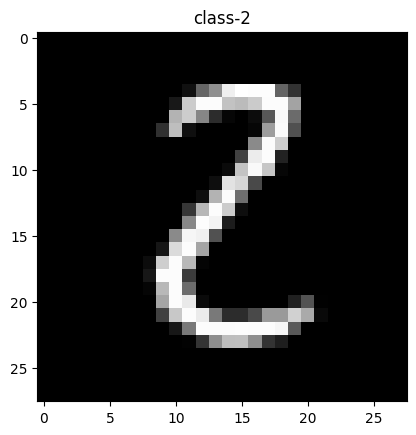

Train image 17230-th sample 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  16 101 143 239 255 253 253
  100  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  24 204 252 252 194 187 203 252
  252 164   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 179 205 134  44   6   0  12  87
  248 107   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  49 190  15   0   0   0   0   6 157
  250  80   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  

In [4]:
def read_images(filename):
    """Read MNIST images"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of images
        image_count = int.from_bytes(f.read(4), 'big')
        # third 4 bytes is the row count
        row_count = int.from_bytes(f.read(4), 'big')
        # fourth 4 bytes is the column count
        column_count = int.from_bytes(f.read(4), 'big')
        # rest is the image pixel data, each pixel is stored as an unsigned byte
        # pixel values are 0 to 255
        image_data = f.read()
        images = np.frombuffer(image_data, dtype=np.uint8).reshape((image_count, row_count, column_count))
        
    return images

def read_labels(filename):
    """Read MNIST labels"""
    
    with gzip.open(filename, 'r') as f:
        # first 4 bytes is a magic number
        magic_number = int.from_bytes(f.read(4), 'big')
        # second 4 bytes is the number of labels
        label_count = int.from_bytes(f.read(4), 'big')
        # rest is the label data, each label is stored as unsigned byte
        # label values are 0 to 9
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        
    return labels


dataset_path = '/home/biswajitrana/Documents/2nd_semester/RKMVERI_2ND/class/ML/SS_assignments_1/'# Change your data path

train_image_filename = ''.join([dataset_path, 'train-images-idx3-ubyte.gz'])
train_label_filename = ''.join([dataset_path, 'train-labels-idx1-ubyte.gz'])

test_image_filename = ''.join([dataset_path, 't10k-images-idx3-ubyte.gz'])
test_label_filename = ''.join([dataset_path, 't10k-labels-idx1-ubyte.gz'])

train_images = read_images(train_image_filename)
train_labels = read_labels(train_label_filename)
print('Train data (X) size: {}, and labels (Y) size: {}' .format(train_images.shape, train_labels.shape))

test_images = read_images(test_image_filename)
test_labels = read_labels(test_label_filename)
print('Test data (X) size: {}, and labels (Y) size: {}' .format(test_images.shape, test_labels.shape))

rand_ids = np.random.choice(train_images.shape[0])
# rand_ids=12553
plt.imshow(train_images[rand_ids, :, :], cmap='gray')
plt.title('class-'+str(train_labels[rand_ids]))
plt.show()

print('Train image {}-th sample ' .format(rand_ids))
print(train_images[rand_ids, :, :])



# Extract 20% data from thhe training data as a validation set. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [3]:
# Your validation set extraction script/code 



In [4]:
test_img= np.array(test_images.reshape(10000, 28*28), dtype = np.float64)

In [5]:
train_reshape = np.array(train_images.reshape(60000, 28*28), dtype = np.float64) #flattening train images

np.random.seed(20)
train_random = np.random.choice(range(60000), 60000, replace = False) #generating random indices
train_df = train_reshape[train_random] #shuffeling train image data
valid_img = train_df[:12000]    #first 12000 as validation images
train_img = train_df[12000:]    #48000 as train images

random_lab = train_labels[train_random]     #shuffeling labels
valid_lab = random_lab[:12000]      #first 12000 as validation labels
train_lab = random_lab[12000:]      #48000 as train labels

test_img = np.array(test_images.reshape(10000, 28*28), dtype = np.float64)  #flattening train images
# print(test_img)

In [6]:
# shapes
print(train_img.shape)
print(valid_img.shape)
print(train_lab.shape)
print(valid_lab.shape)

(48000, 784)
(12000, 784)
(48000,)
(12000,)


In [7]:
#peek

# rand_ids = np.random.choice(X_train.shape[0])
# print(rand_ids)
# print(y_train[rand_ids])
# plt.imshow(X_train[rand_ids, :].reshape(28,28), cmap='gray')
# plt.title('class-'+str(y_train[rand_ids]))
# plt.show()

# rand_ids = np.random.choice(X_val.shape[0])
# print(rand_ids)
# print(y_val[rand_ids])
# plt.imshow(X_val[rand_ids, :].reshape(28,28), cmap='gray')
# plt.title('class-'+str(y_val[rand_ids]))
# plt.show()

# Implement k-NN classification rule/algorithm, we have discussed in our class. <font color='red'>Please do not use some standard function from scikit-learn or others!</font>

In [8]:
# Your k-NN algorithm script/code 


In [45]:
# Your k-NN algorithm script/code 

# Distance Functions
# 1. euclidean (L2)
def L2(x):
    return np.linalg.norm(train_img - x, axis = 1)
# 2.Manhatten (L1)
def L1(x):
    return np.sum(np.abs(train_img - x), axis = 1)
# 3. Linf Norm
def Linf(x):
    return np.max(np.abs(train_img - x), axis = 1)

#Accuracy Function 
def acc_percentage(x,y):
    z = (np.array(x) == np.array(y))
    return (np.sum(z)*100)/len(x)


# Defining Prediction Function for k = 1, 3, 5,..., 25

def prediction(data, function):
    a = {} # Dictionary
    for i in range(1,26,2):
        a[i] = []
    for j in data:
        dist = function(j)
        dist_dataframe = pd.DataFrame(dist)
        dist_dataframe["label"] = train_lab
        dist_sorted_dataframe = dist_dataframe.sort_values(by = [0])
        # print(temp_sort)
        for k in range(1,26,2):
            shortest_k = dist_sorted_dataframe.iloc[0:k]
            b = shortest_k.value_counts("label").index[0]
            a[k].append(b)
    print("The values of k are in column indexes \n the values along column are predictions \n values on right most are sample no.\n")
    return pd.DataFrame(a)
    

# Defining Prediction Function for a particular value of k
    
def prediction_k(data,label, k, function):
    a = {} # Dictionary
    for i in range(1,k+1,2):
        a[i] = []
    for j in data:
        temp = function(j)
        temp_dataframe = pd.DataFrame(temp)
        temp_dataframe["label"] = label
        temp_sort = temp_dataframe.sort_values(by = [0])
        temp_k = temp_sort.iloc[0:k]
        b = temp_k.value_counts("label").index[0]
        a[k].append(b)
    print("The values of {} are in column indexes and the values along column are predictions". format(k))
    return pd.DataFrame(a[k]) 

# For P=2 , <span style="color:red">L2 NORM (Euclidean)</span>

The values of k are in column indexes 
 the values along column are predictions 
 values on right most are sample no.

       1   3   5   7   9   11  13  15  17  19  21  23  25
0       9   9   9   9   9   9   9   9   9   9   9   9   9
1       5   5   5   5   5   5   5   5   5   5   5   5   5
2       7   7   7   7   7   7   7   7   7   7   7   7   7
3       7   7   7   7   7   7   7   7   7   7   7   7   7
4       1   1   1   1   1   1   1   1   1   1   1   1   1
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
11995   2   2   2   2   2   2   2   2   2   2   2   2   2
11996   9   9   9   9   9   9   9   9   9   9   9   9   9
11997   8   8   8   8   8   8   8   8   8   8   8   8   8
11998   1   1   1   1   1   1   1   1   1   1   1   1   1
11999   4   4   4   4   4   4   4   4   4   9   9   9   9

[12000 rows x 13 columns]
Manhaten : Best k = 1 with highest accuracy = 97.15833333333333
CPU times: user 48min 11s, sys: 23min, total: 1h 11min 12s
Wall time: 1h 12min 4s


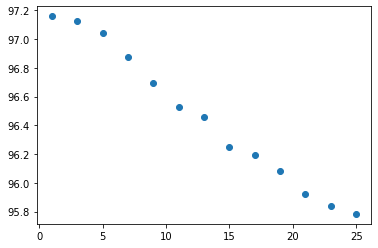

In [10]:
%%time
Euclid = prediction(valid_img, L2) #getting predicted array
print(Euclid)
acc_Euclid = Euclid.apply(acc_percentage, y = valid_lab)
sort_acc_Euclid=acc_Euclid.sort_values(ascending = False)

# plot using acc_Euclid

# Finding the Highest k
Euclid_k_highest = sort_acc_Euclid.index[0]
Euclid_k_highest
# Finding the Highest Accuracy
Euclid_Value = sort_acc_Euclid.values[0]
Euclid_Value
print(f"Manhaten : Best k = {Euclid_k_highest} with highest accuracy = {Euclid_Value}")
plt.scatter(sort_acc_Euclid.index, sort_acc_Euclid.values)

In [11]:
sort_acc_Euclid

1     97.158333
3     97.125000
5     97.041667
7     96.875000
9     96.691667
11    96.525000
13    96.458333
15    96.250000
17    96.191667
19    96.083333
21    95.925000
23    95.841667
25    95.783333
dtype: float64

# For P=1 , <span style="color:red">L1 NORM (Manhaten)</span>


The values of k are in column indexes 
 the values along column are predictions 
 values on right most are sample no.

       1   3   5   7   9   11  13  15  17  19  21  23  25
0       9   9   9   9   9   9   9   9   9   9   9   9   9
1       5   5   5   5   5   5   5   5   5   5   5   5   5
2       7   7   7   7   7   7   7   7   7   7   7   7   7
3       7   7   7   7   7   7   7   7   7   7   7   7   7
4       1   1   1   1   1   1   1   1   1   1   1   1   1
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
11995   2   2   2   2   2   2   2   2   2   2   2   2   2
11996   9   9   9   9   9   9   9   9   9   9   9   9   9
11997   8   8   8   8   8   8   8   8   8   8   8   8   8
11998   1   1   1   1   1   1   1   1   1   1   1   1   1
11999   4   4   4   4   4   4   4   4   4   4   4   4   9

[12000 rows x 13 columns]
Manhaten : Best k = 3 with highest accuracy = 96.60833333333333
CPU times: user 25min 29s, sys: 11min 41s, total: 37min 11s
Wall time: 37min 16s


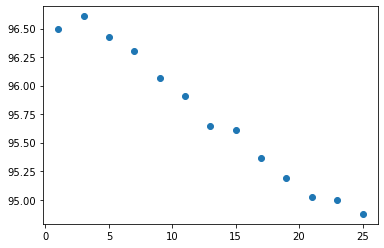

In [12]:
%%time
Manhaten = prediction(valid_img, L1) #getting predictions for all k
print(Manhaten)
acc_Manhaten = Manhaten.apply(acc_percentage, y = valid_lab)  #acc_Manhaten
sort_acc_Manhaten=acc_Manhaten.sort_values(ascending = False) # accuracy array for all k

# plot using acc_Manhaten

# Finding the Highest k
Manhaten_k_highest = sort_acc_Manhaten.index[0]
Manhaten_k_highest
# Finding the Highest Accuracy
Manhaten_Value = sort_acc_Manhaten.values[0]
Manhaten_Value

print(f"Manhaten : Best k = {Manhaten_k_highest} with highest accuracy = {Manhaten_Value}")
plt.scatter(sort_acc_Manhaten.index, sort_acc_Manhaten.values)

In [13]:
sort_acc_Manhaten

3     96.608333
1     96.500000
5     96.425000
7     96.300000
9     96.066667
11    95.908333
13    95.641667
15    95.608333
17    95.366667
19    95.191667
21    95.025000
23    95.000000
25    94.875000
dtype: float64

# For P=1 , <span style="color:red">L-inf NORM</span>

The values of k are in column indexes 
 the values along column are predictions 
 values on right most are sample no.

       1   3   5   7   9   11  13  15  17  19  21  23  25
0       9   9   9   9   9   9   9   9   9   9   9   9   9
1       0   0   3   0   7   7   7   7   7   3   7   7   7
2       6   4   4   4   4   4   4   4   4   4   4   4   4
3       7   7   7   7   7   7   7   7   7   7   7   7   7
4       1   1   1   1   1   1   1   1   1   1   1   1   1
...    ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..  ..
11995   6   6   6   6   6   6   2   2   2   6   6   6   6
11996   9   9   9   9   9   9   9   9   9   9   9   9   9
11997   3   3   3   3   3   3   3   3   3   3   3   3   3
11998   1   1   1   1   1   1   1   1   1   1   1   1   1
11999   9   8   8   8   8   8   8   8   8   8   8   8   8

[12000 rows x 13 columns]
Chebychev : Best k = 1 with highest accuracy = 81.66666666666667
CPU times: user 24min 36s, sys: 11min 25s, total: 36min 2s
Wall time: 36min 2s


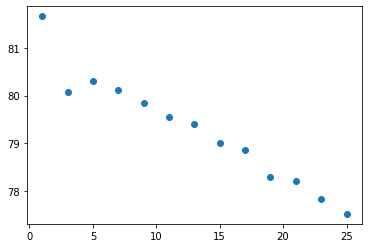

In [14]:
%%time
L_inf = prediction(valid_img, Linf)
print(L_inf)
acc_Linf = L_inf.apply(acc_percentage, y = valid_lab)
sort_acc_Linf=acc_Linf.sort_values(ascending = False)

# plot using acc_Linf

# Finding the Highest k
Linf_k_highest = sort_acc_Linf.index[0]
Linf_k_highest
# Finding the Highest Accuracy
Linf_Value = sort_acc_Linf.values[0]
Linf_Value
print(f"Chebychev : Best k = {Linf_k_highest} with highest accuracy = {Linf_Value}")
plt.scatter(sort_acc_Linf.index, sort_acc_Linf.values)

In [15]:
sort_acc_Linf

1     81.666667
5     80.300000
7     80.125000
3     80.075000
9     79.841667
11    79.541667
13    79.400000
15    79.000000
17    78.858333
19    78.300000
21    78.208333
23    77.825000
25    77.516667
dtype: float64

# Accuracy Matrices

In [16]:
acc_Euclid

1     97.158333
3     97.125000
5     97.041667
7     96.875000
9     96.691667
11    96.525000
13    96.458333
15    96.250000
17    96.191667
19    96.083333
21    95.925000
23    95.841667
25    95.783333
dtype: float64

In [17]:
acc_Manhaten

1     96.500000
3     96.608333
5     96.425000
7     96.300000
9     96.066667
11    95.908333
13    95.641667
15    95.608333
17    95.366667
19    95.191667
21    95.025000
23    95.000000
25    94.875000
dtype: float64

In [18]:
acc_Linf

1     81.666667
3     80.075000
5     80.300000
7     80.125000
9     79.841667
11    79.541667
13    79.400000
15    79.000000
17    78.858333
19    78.300000
21    78.208333
23    77.825000
25    77.516667
dtype: float64

In [19]:
p=[1,2,3]

k = list(range(1,26,2))

# Create DataFrame
df = pd.DataFrame([acc_Manhaten,acc_Euclid , acc_Linf], columns=k, index=p)

df

,1,3,5,7,9,11,13,15,17,19,21,23,25
1,96.500000,96.608333,96.425000,96.300,96.066667,95.908333,95.641667,95.608333,95.366667,95.191667,95.025000,95.000000,94.875000
2,97.158333,97.125000,97.041667,96.875,96.691667,96.525000,96.458333,96.250000,96.191667,96.083333,95.925000,95.841667,95.783333
3,81.666667,80.075000,80.300000,80.125,79.841667,79.541667,79.400000,79.000000,78.858333,78.300000,78.208333,77.825000,77.516667


# Best value of K = <span style="color:red">1<span>
# Best value of P = <span style="color:red">2 (Eulidean)<span>

# ---------------------------------------------------------------------------------------------------------------------------

# <span style="color:green"> Plotting K vs P vs Accuracy </span>

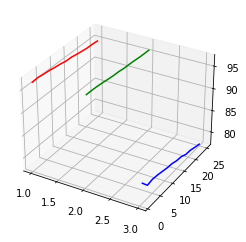

In [20]:
# 3D Plot of X = p vs Y = k vs Z = Accuracy Percentage

ax = plt.axes(projection='3d')

x1 = [1]*13 # Manhaten i.e. p = 1
x2 = [2]*13 # Euclidean i.e. p = 2
x3 = [3]*13 # Chebyshev i.e. p = 3

y1 = np.array(acc_Manhaten.index)
y2 = np.array(acc_Euclid.index)
y3 = np.array(acc_Linf.index)

z1 = acc_Manhaten.values
z2 = acc_Euclid.values
z3 = acc_Linf.values

ax.plot3D(x1, y1, z1, 'red')
ax.plot3D(x2, y2, z2, 'green')
ax.plot3D(x3, y3, z3, 'blue')

#### 3-D interactive plot

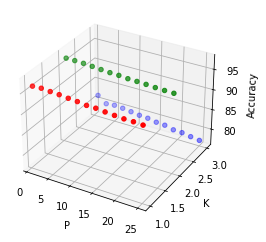

In [21]:
# 3D Plot of X = p vs Y = k vs Z = Accuracy Percentage

X = np.array(df.index)
Y = np.array(df.columns)
X, Y = np.meshgrid(Y, X)

Z = df.values

# Flatten the arrays for scatter plot
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

# Create a color array for each row
colors = ['red', 'green', 'blue']
row_colors = np.repeat(colors, len(df.columns))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=row_colors)

ax.set_xlabel('P')
ax.set_ylabel('K')
ax.set_zlabel('Accuracy')

plt.savefig('3d_plot.png') #saving the image of the plot

plt.show()


##### Hover on points to see the values

In [22]:

# Hover on points to see the values
import plotly.graph_objects as go

# Assuming 'df' is your DataFrame
X = np.array(df.index)
Y = np.array(df.columns)
X, Y = np.meshgrid(Y, X)

Z = df.values

# Flatten the arrays for scatter plot
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

fig = go.Figure(data=[go.Scatter3d(x=X, y=Y, z=Z, mode='markers', 
                                   marker=dict(size=4, color=Z, colorscale='Viridis'), 
                                   hovertemplate='Index: %{x}<br>Column: %{y}<br>Data: %{z}<extra></extra>')])

fig.update_layout(scene = dict(
                    xaxis_title='K',
                    yaxis_title='P',
                    zaxis_title='Accuracy'))
fig.show()

# Predicting labels of Test Images and finding the Accuracy

In [34]:
original_train_img_set= np.concatenate((train_img,valid_img),axis=0)

(60000, 784)

In [39]:
original_train_label_set = np.concatenate((train_lab,valid_lab),axis=0)

In [38]:
original_train_img_set.shape

(60000, 784)

In [42]:
original_train_label_set.shape

(60000,)

In [43]:
def L2_dist(x):
    return np.linalg.norm(original_train_img_set - x, axis = 1)

In [46]:
test_pred=prediction_k(test_img,original_train_label_set, 1, L2_dist)
print(test_pred)

test_accuracy = test_pred.apply(acc_percentage, y = test_labels)
print(f"Accuracy on test set for k=1 and L2: {test_accuracy}")

The values of 1 are in column indexes and the values along column are predictions
      0
0     7
1     2
2     1
3     0
4     4
...  ..
9995  2
9996  3
9997  4
9998  5
9999  6

[10000 rows x 1 columns]
Accuracy on test set for k=1 and L2: 0    96.91
dtype: float64


In [48]:
print(f"Accuracy on test set for k=1 and L2: {test_accuracy.values[0]}")

Accuracy on test set for k=1 and L2: 96.91
